In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:

file_path = './results-2021-12-18.csv'
df = pd.read_csv(file_path)
# print(type(df))
df1 = df[df["algorithm"] == 'SVM' ]
row_labels = df1.index[:]
col_labels = df1.columns[[5,8]]
df1.loc[row_labels,col_labels]









,no_features,train_energy(J)
2,4084,0.530155
10,8169,0.412243
12,8169,0.058213
18,8169,0.636854
19,8169,0.501067
...,...,...
3570,8169,0.057513
3577,1633,0.275112
3585,5718,0.371999
3593,8169,0.000000


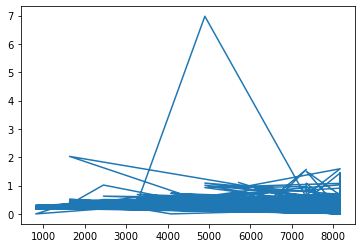

In [180]:
#先看一下大概是什么样的
row_labels = df1.index[:]
col_feature_labels = df1.columns[5]
col_energy_labels = df1.columns[8]
x = df1.loc[row_labels,col_feature_labels].to_numpy()
y = df1.loc[row_labels,col_energy_labels].to_numpy()
plt.plot(x,y)
